<a href="https://colab.research.google.com/github/ivanabdurrafie/PCVK_Genap_2021/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma correction pada citra
---------------------------------
Masukkan nilai Gamma: 10


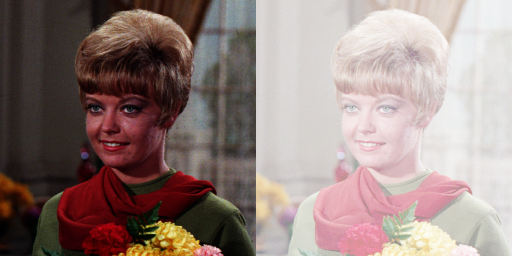

In [13]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/week5/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

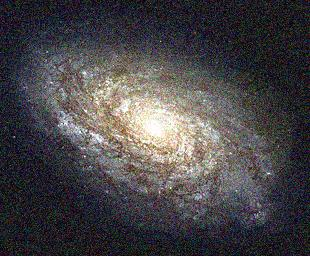

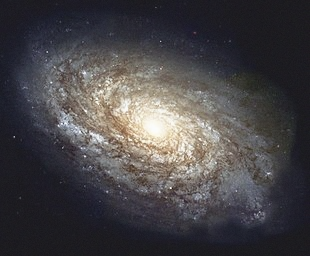

PSNR :  19.92196095594035  db


In [6]:
import glob
import math
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 itu maksudnya tidak ada noise sama sekali sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

img_original = cv.imread('/content/drive/MyDrive/PCVK/week5/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/week5/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

denoised = np.zeros(cv_img[0].shape)
totalGambar = 100
for i in range(totalGambar):
  denoised = denoised+cv_img[i]
denoised = np.uint16(denoised/totalGambar)

psnr = PSNR(img_original, denoised)
cv2_imshow(cv_img[0])
cv2_imshow(denoised)

print('PSNR : ', psnr, ' db')

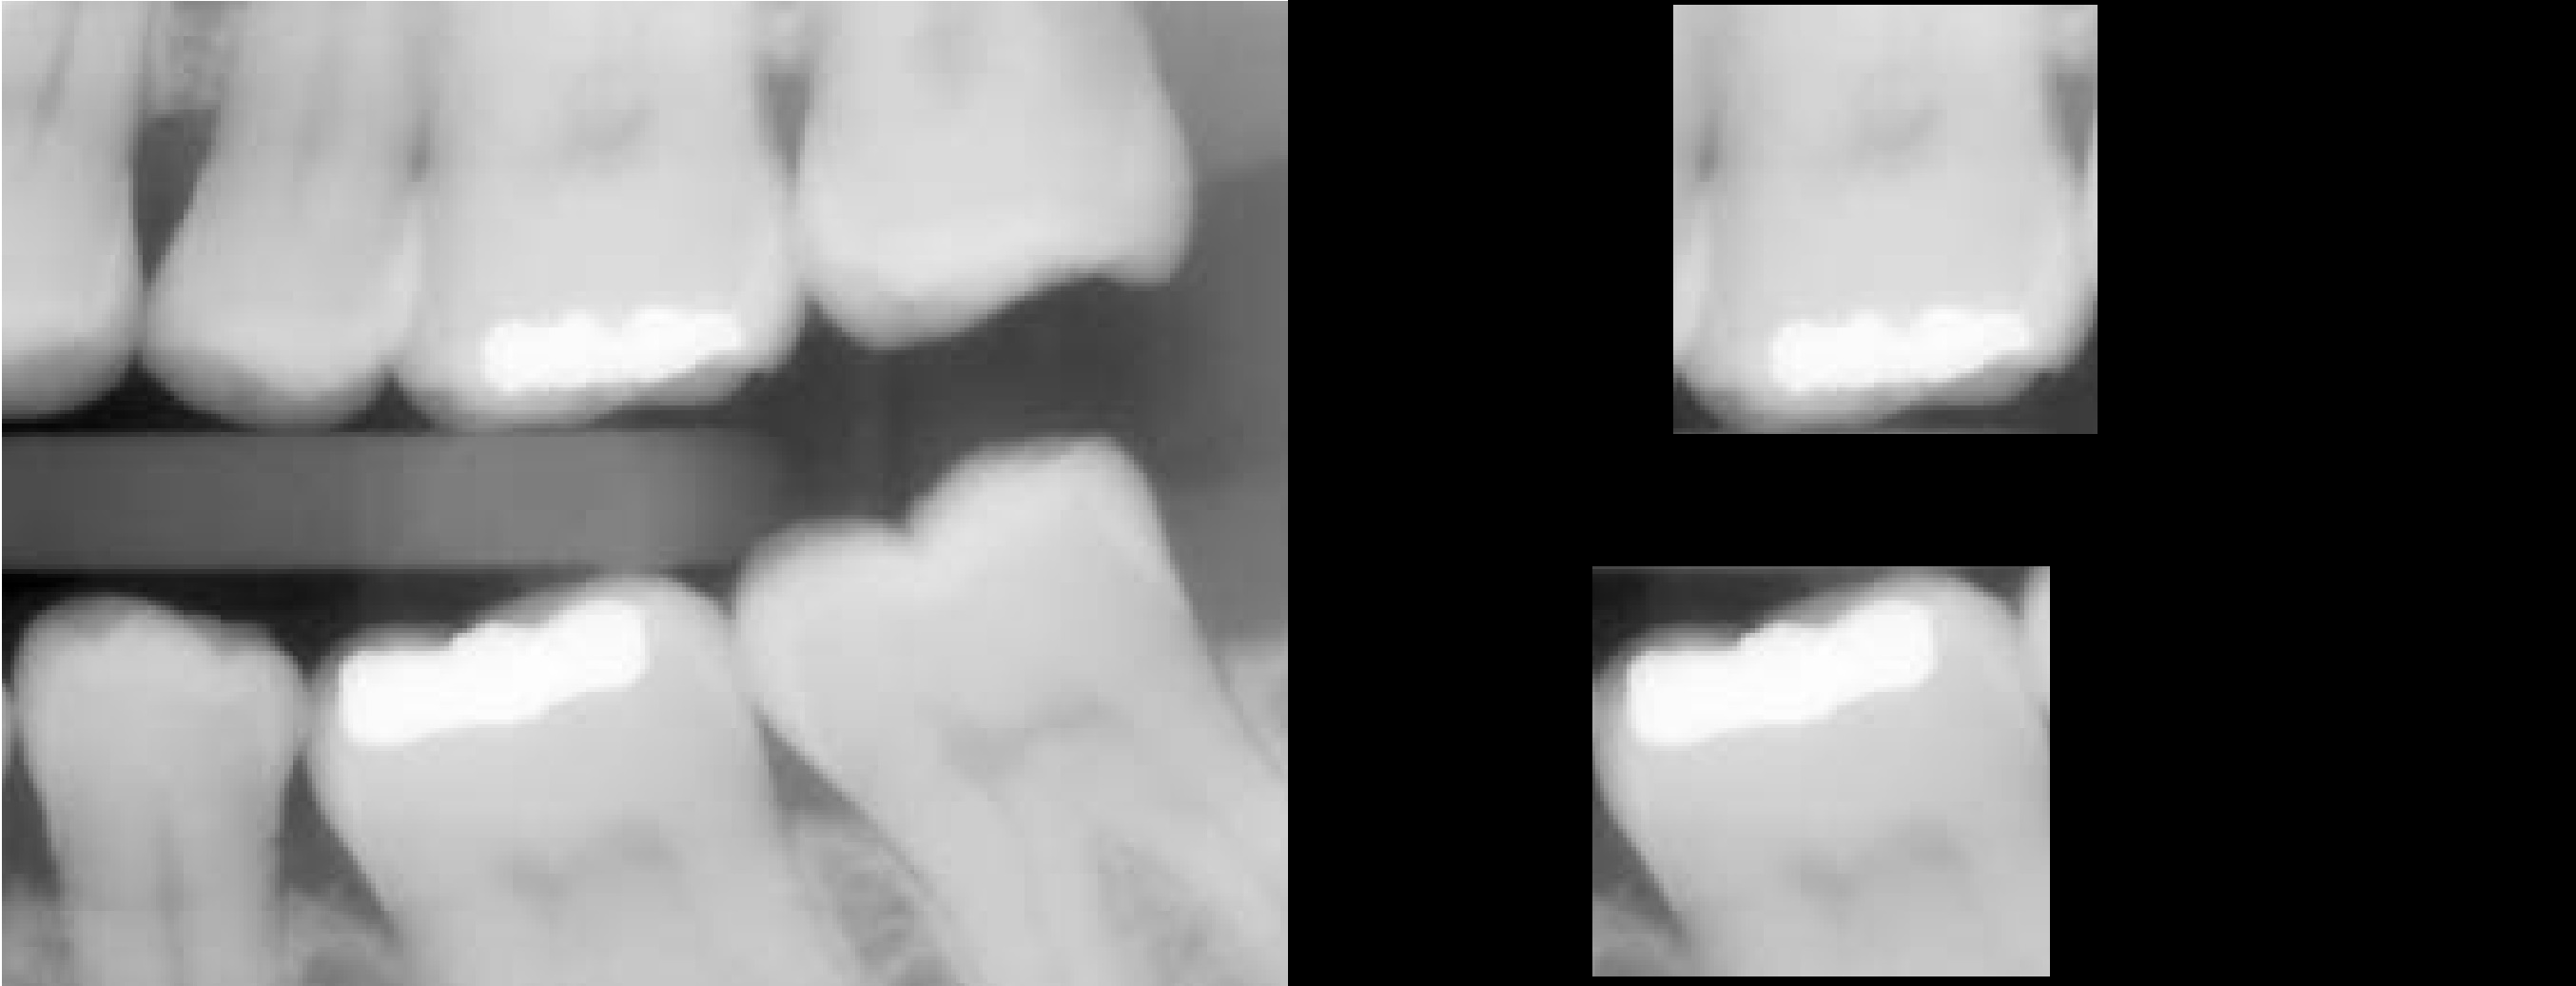

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK/week5/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result1 = img & mask1

final_frame = cv.hconcat((img, result1))
cv2_imshow(final_frame)

Menggunakan operasi OR

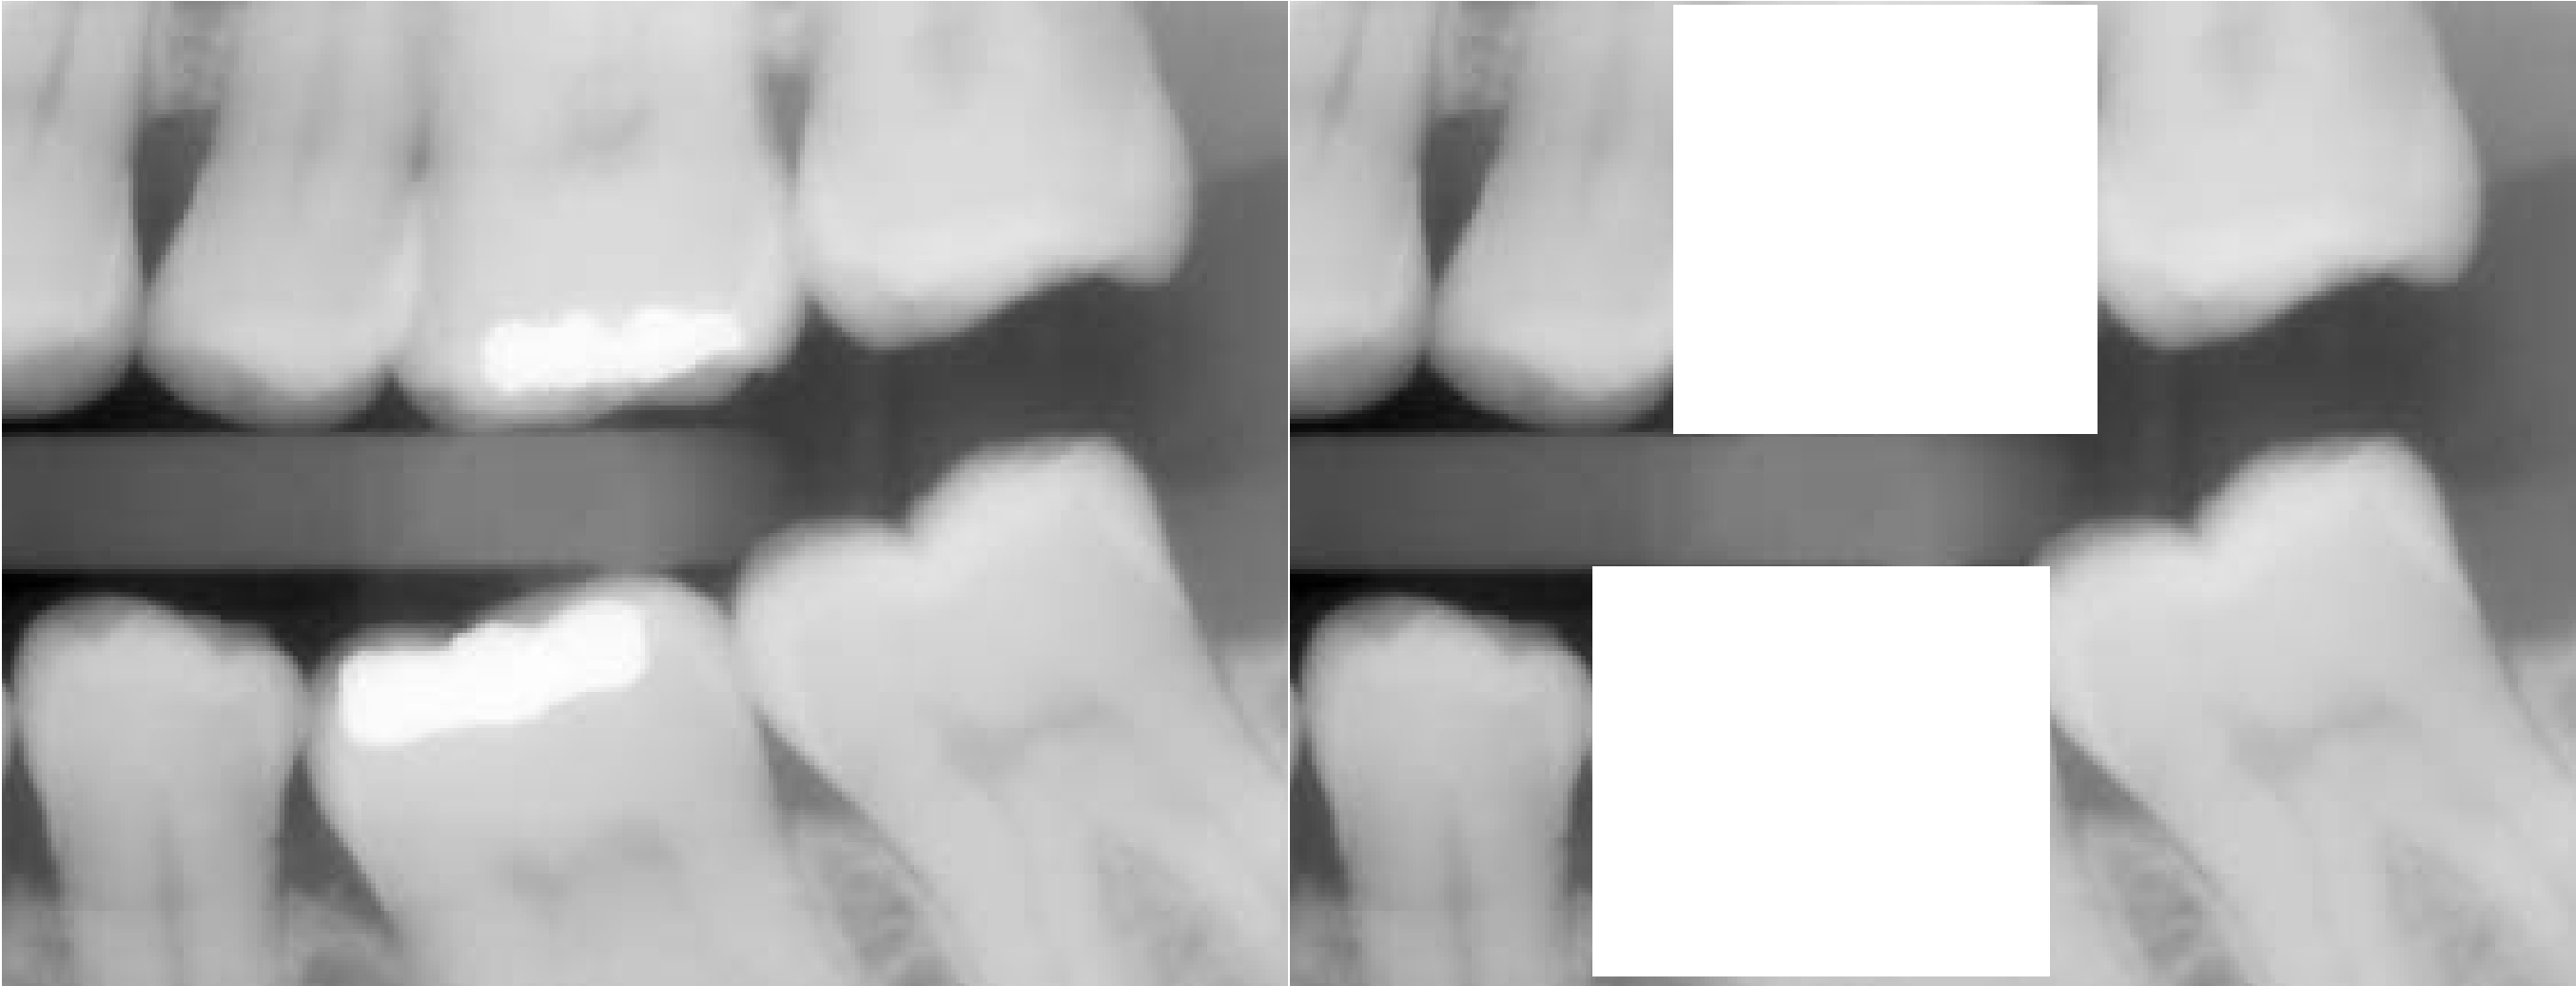

In [12]:
img = cv.imread('/content/drive/MyDrive/PCVK/week5/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

Menggunakan Operator NOT

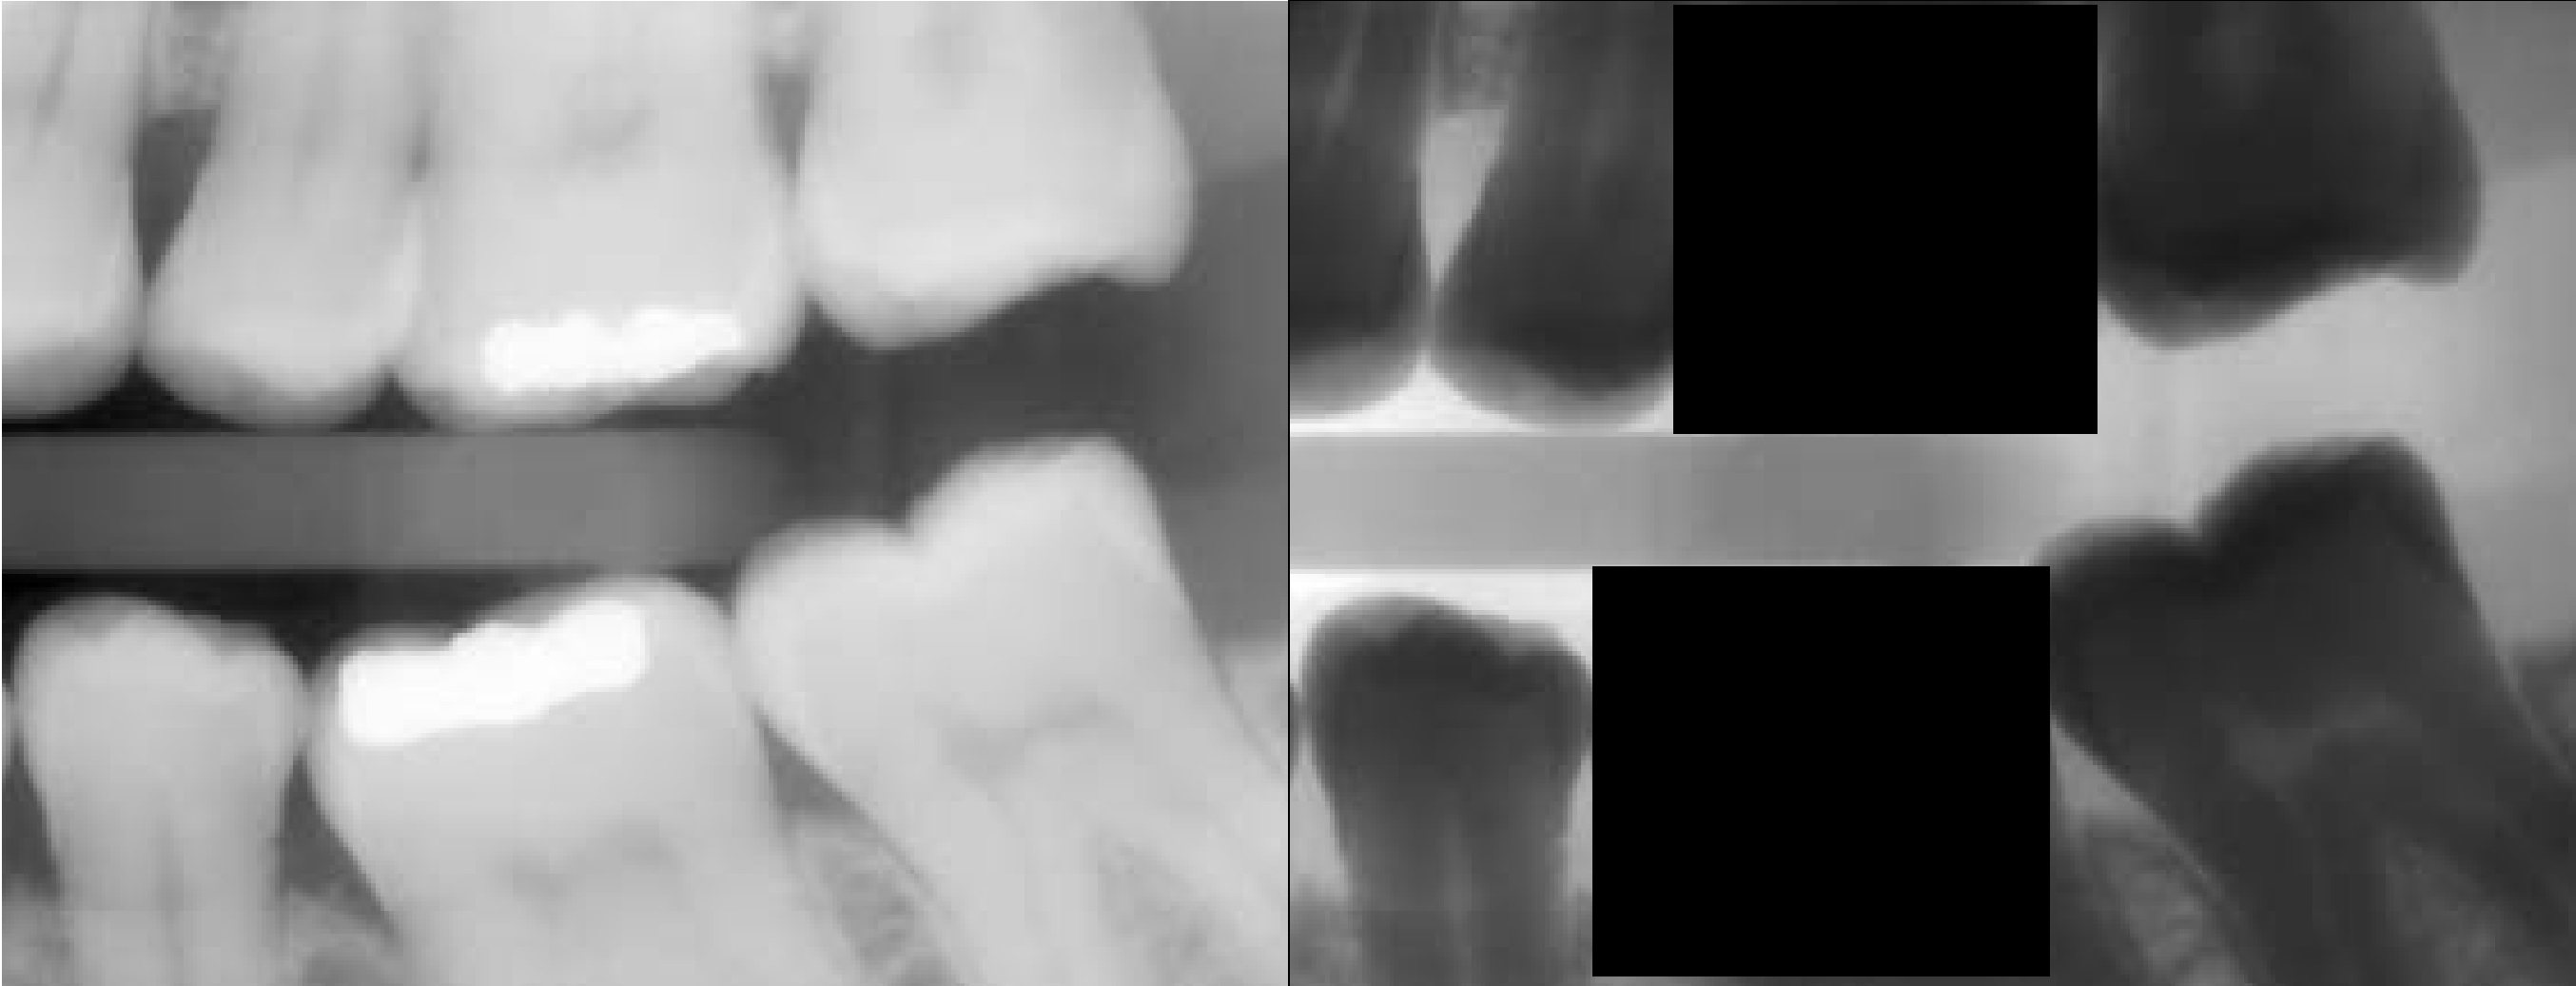

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/week5/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

Menggunakan Operasi XOR

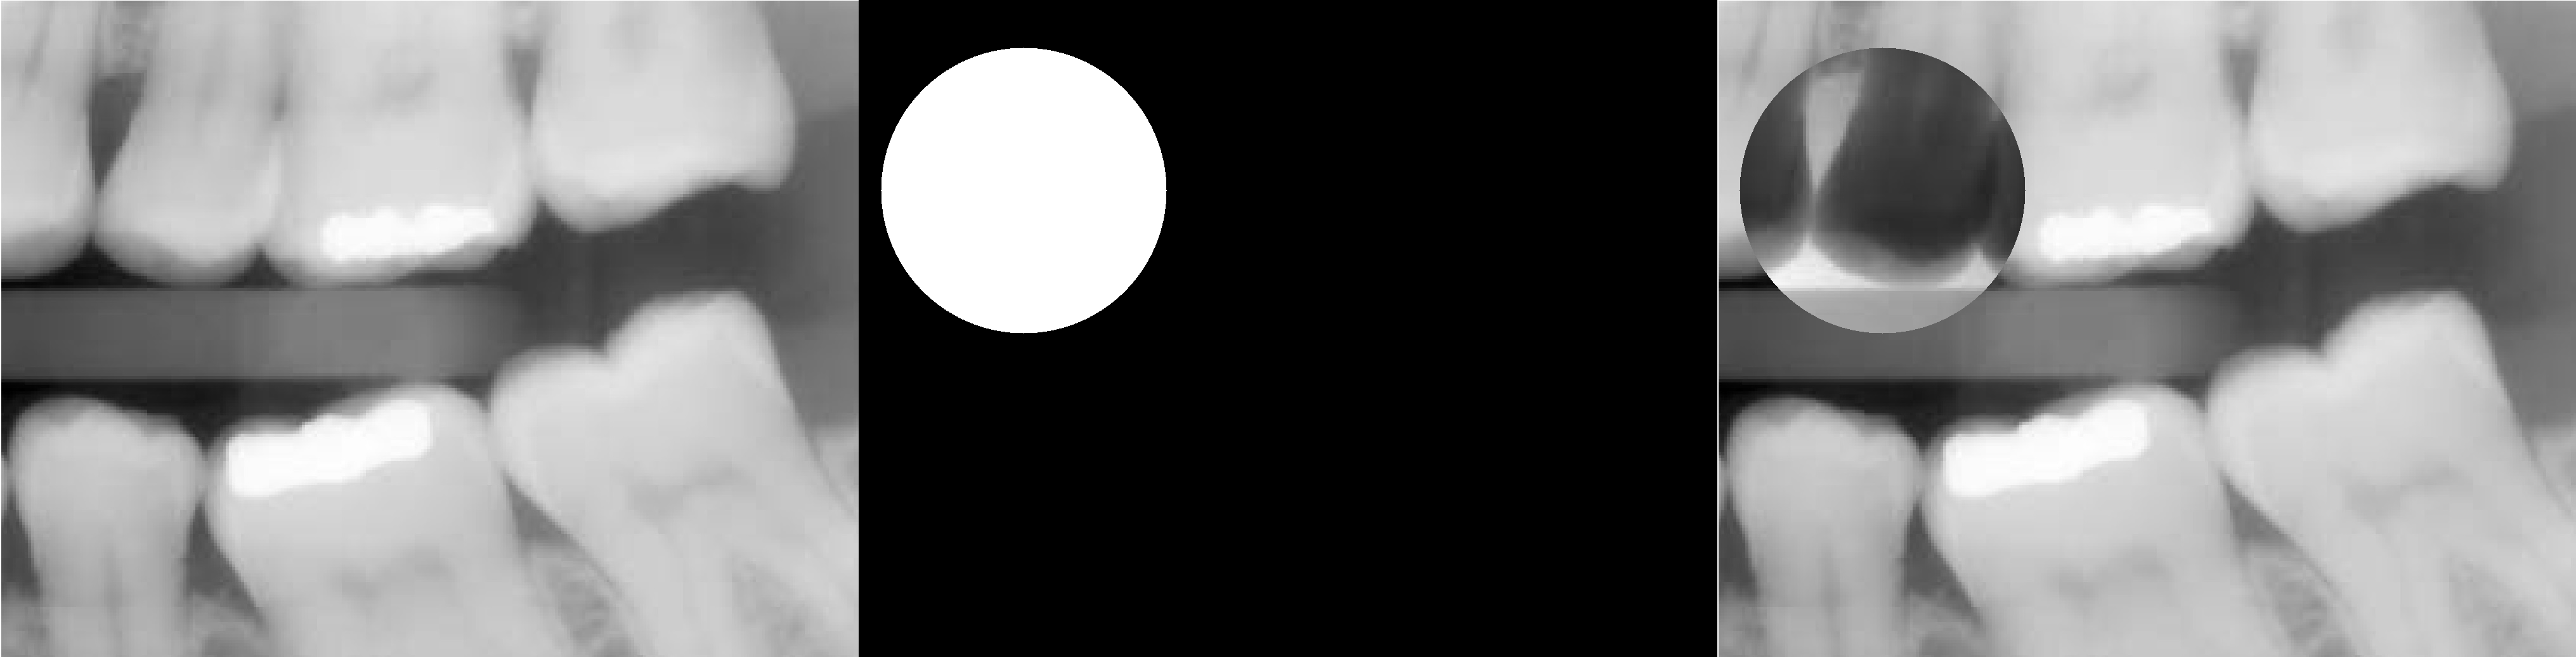

In [10]:
img = cv.imread('/content/drive/MyDrive/PCVK/week5/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Menggunakan Operator AND

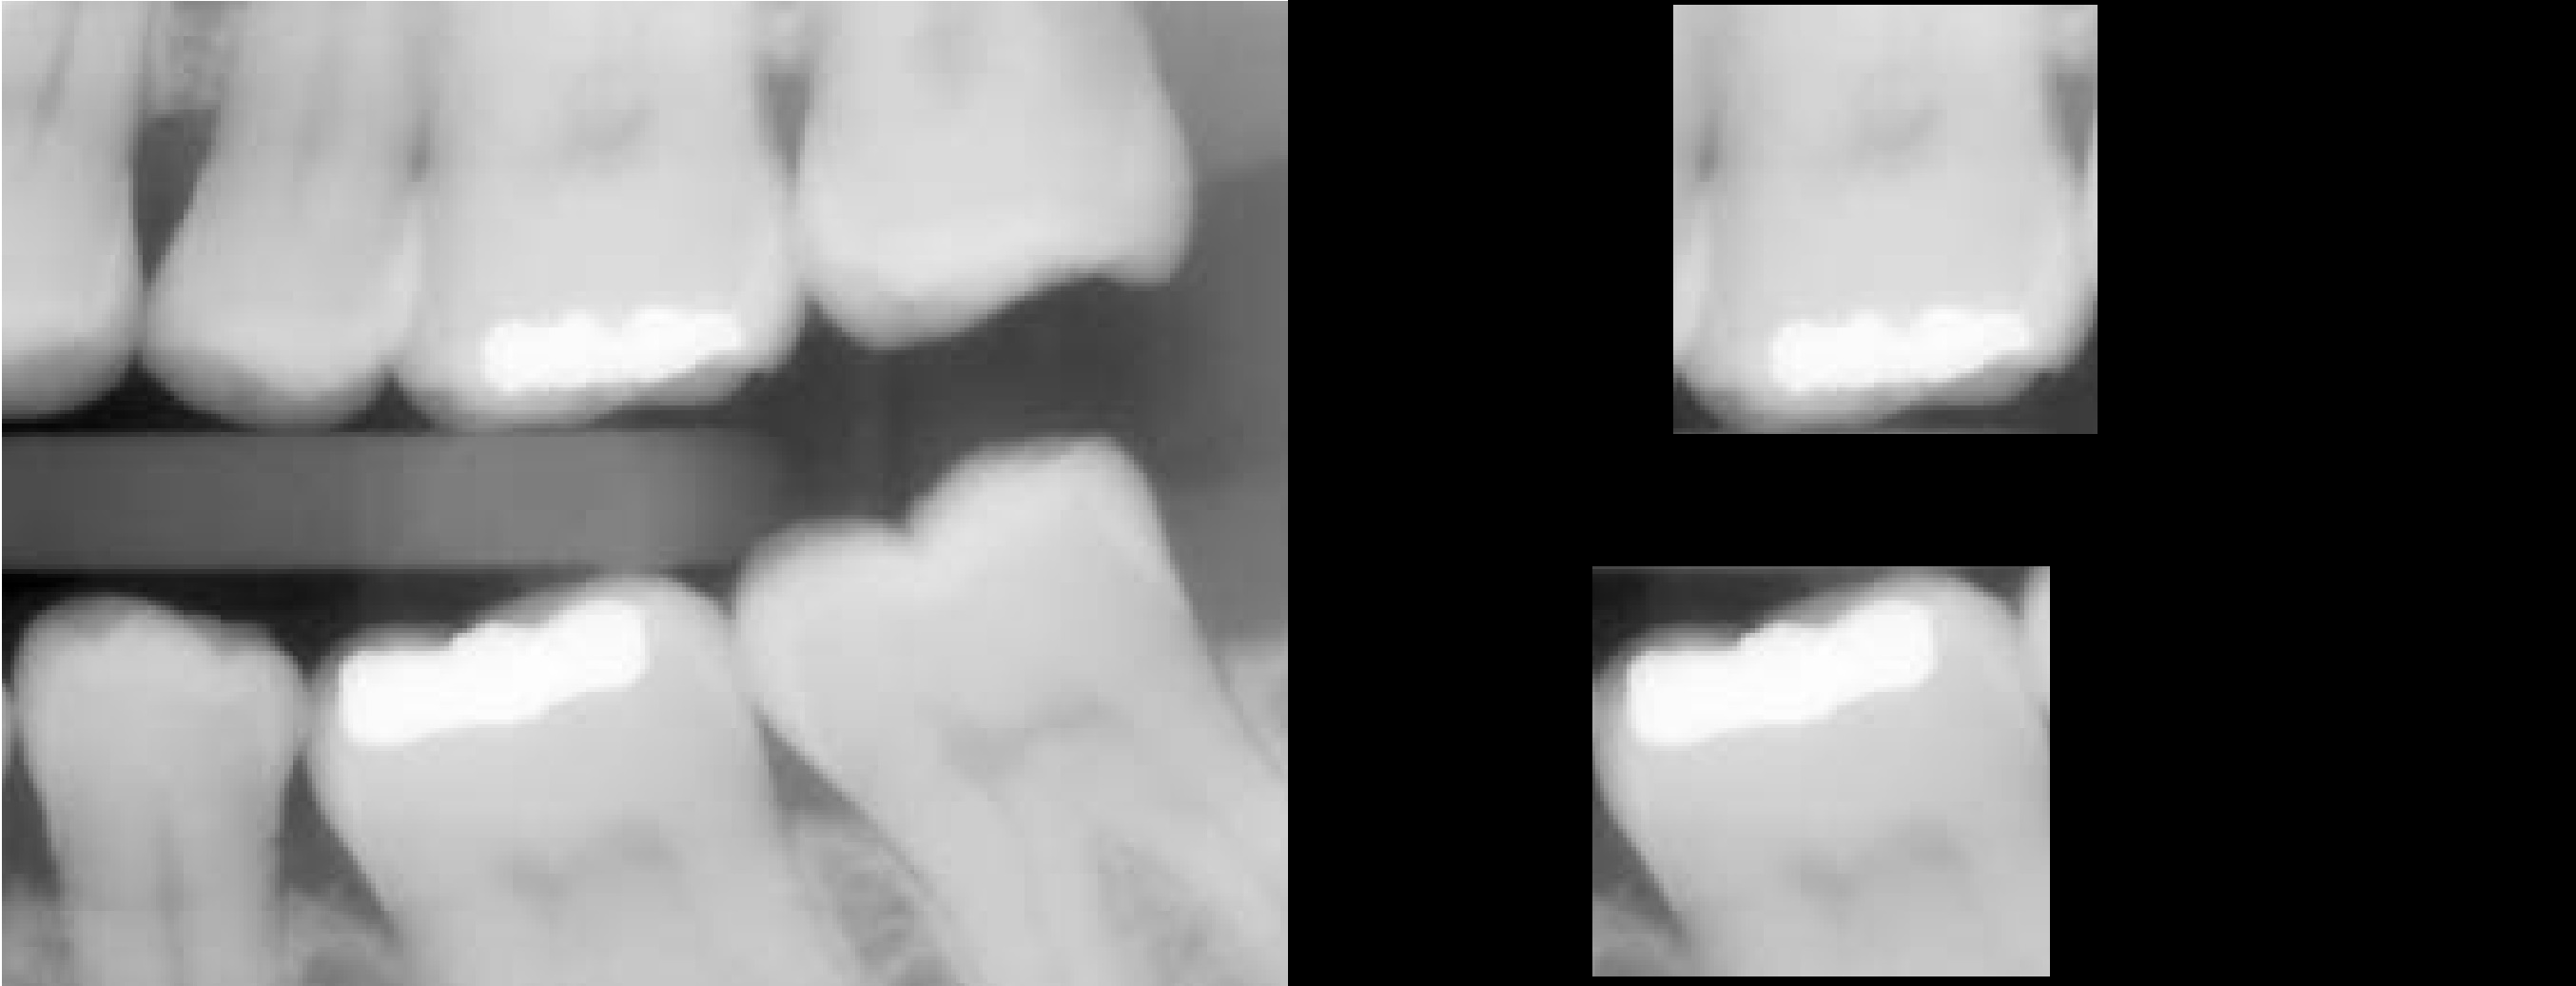

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/week5/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result1 = img & mask1

final_frame = cv.hconcat((img, result1))
cv2_imshow(final_frame)